导致梯度消失问题的一个常见的原因是跟在每层的线性运算之后的激活函数 σ 。从历史上看，sigmoid函数 1/(1+exp(−x)) （ 4.1节 提到过）很流行，因为它类似于阈值函数。由于早期的人工神经网络受到生物神经网络的启发，神经元要么完全激活要么完全不激活（就像生物神经元）的想法很有吸引力。让我们仔细看看sigmoid函数为什么会导致梯度消失。

In [1]:
%matplotlib inline
import torch
from d2l import torch as d2l

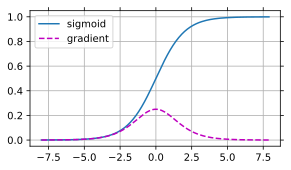

In [3]:
x =torch.arange(-8.0,8.0,0.1,requires_grad=True)
y =torch.sigmoid(x)
y.backward(torch.ones_like(x))

d2l.plot(x.detach().numpy(),[y.detach().numpy(),x.grad.numpy()],legend=['sigmoid','gradient'],figsize=(4.5,2.5))

正如你所看到的，当它的输入很大或是很小时，sigmoid函数的梯度都会消失。此外，当反向传播通过许多层时，除非我们在刚刚好的地方，这些地方sigmoid函数的输入接近于零，否则整个乘积的梯度可能会消失。当我们的网络有很多层时，除非我们很小心，否则在某一层可能会切断梯度。事实上，这个问题曾经困扰着深度网络的训练。因此，更稳定（但在神经科学的角度看起来不太合理）的ReLU系列函数已经成为从业者的默认选择。

梯度爆炸

相反的问题，当梯度爆炸时，可能同样令人烦恼。为了更好地说明这一点，我们生成100个高斯随机矩阵，并将它们与某个初始矩阵相乘。对于我们选择的尺度（方差 σ2=1 ），矩阵乘积发生爆炸。当这种情况是由于深度网络的初始化所导致时，我们没有机会让梯度下降优化器收敛。

In [5]:
M =torch.normal(0,1,size=(4,4))
print('一个矩阵\n',M)

for i in range(100):
    M=torch.mm(M,torch.normal(0,1,size=(4,4)))

print('乘以100个矩阵之后\n',M)

一个矩阵
 tensor([[-0.2010,  0.2202,  1.4642,  0.0335],
        [ 1.3932, -0.0932, -0.0662,  2.1407],
        [-1.0493,  1.0479, -0.5869, -0.9048],
        [-1.5676,  0.3017,  0.2464, -0.7613]])
乘以100个矩阵之后
 tensor([[ 1.4774e+24, -5.8874e+24,  1.0727e+25,  2.5014e+24],
        [-2.3038e+24,  9.1810e+24, -1.6729e+25, -3.9007e+24],
        [ 1.1103e+24, -4.4248e+24,  8.0624e+24,  1.8800e+24],
        [ 1.5947e+24, -6.3550e+24,  1.1579e+25,  2.7001e+24]])
